# Neal's Funnel Target Practice

In [17]:
] activate "../"

  Activating project at `~/Glamdring/MicroCanonicalHMC.jl`


In [18]:
# The statistical inference frame-work we will use
using Turing
using Random
using PyPlot
using LinearAlgebra

using Revise
using MicroCanonicalHMC

In [19]:
d = 21
@model function funnel()
    θ ~ Normal(0, 3)
    z ~ MvNormal(zeros(d-1), exp(θ)*I)
    x ~ MvNormal(z, I)
end

@model function true_funnel()
    θ ~ Normal(0, 3)
    z ~ MvNormal(zeros(d-1), I)
    zz = z .* exp(θ/2)
    x ~ MvNormal(zz, I)
    
end

true_funnel (generic function with 2 methods)

In [20]:
Random.seed!(1)
(;x) = rand(funnel() | (θ=0,))
funnel_model = funnel() | (;x)

Random.seed!(1)
(;x) = rand(true_funnel() | (θ=0,))
true_model = true_funnel() | (;x)

DynamicPPL.Model{typeof(true_funnel), (), (), (), Tuple{}, Tuple{}, DynamicPPL.ConditionContext{NamedTuple{(:x,), Tuple{Vector{Float64}}}, DynamicPPL.DefaultContext}}(true_funnel, NamedTuple(), NamedTuple(), ConditionContext((x = [0.7273459156073062, -0.7137895625029701, -1.3112158987551843, 3.195064335503728, 0.6578668590997088, 1.8201670957594605, 2.5774094189910475, 1.2959606640141557, -2.615684720848553, -1.7192495259048919, 0.38510954102334116, 0.7049475219687015, 1.4527158089056038, 1.5438517444010695, 0.8504145036053463, 0.9997932200168839, -0.14767140951984356, 0.6046583528834097, -0.38477500804604936, -1.506202996455002],), DynamicPPL.DefaultContext()))

## MCHMC

In [21]:
alpha_eps = 0.25
alpha_L = 0.11

0.11

In [22]:
target = TuringTarget(funnel_model; d=d, compute_MAP=false)
true_target = TuringTarget(true_model; d=d, compute_MAP=false)

TuringTarget(DynamicPPL.Model{typeof(true_funnel), (), (), (), Tuple{}, Tuple{}, DynamicPPL.ConditionContext{NamedTuple{(:x,), Tuple{Vector{Float64}}}, DynamicPPL.DefaultContext}}(true_funnel, NamedTuple(), NamedTuple(), ConditionContext((x = [0.7273459156073062, -0.7137895625029701, -1.3112158987551843, 3.195064335503728, 0.6578668590997088, 1.8201670957594605, 2.5774094189910475, 1.2959606640141557, -2.615684720848553, -1.7192495259048919, 0.38510954102334116, 0.7049475219687015, 1.4527158089056038, 1.5438517444010695, 0.8504145036053463, 0.9997932200168839, -0.14767140951984356, 0.6046583528834097, -0.38477500804604936, -1.506202996455002],), DynamicPPL.DefaultContext())), 21, Any[θ, z1, z2, z3, z4, z5, z6, z7, z8, z9  …  z11, z12, z13, z14, z15, z16, z17, z18, z19, z20], ContinuousDistribution[Normal{Float64}(μ=0.0, σ=3.0), IsoNormal(
dim: 20
μ: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Σ: [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 

In [27]:
spl = MCHMC(0.0, alpha_L*sqrt(d); init_eps=0.3, varE_wanted=0.01, sigma=ones(d))
samples_mchmc = Sample(spl, target, 100_000;
                       tuning_method="AdaptiveStep",
                       burn_in=5_000, dialog=false);

[ Info: Using given sigma ✅
[ Info: Tuning eps ⏳
[ Info: Using given L ✅
[ Info: Initial nu 0.3300793375350244
[ Info: Starting burn in ⏳
[ Info: Virial loss condition met during burn-in at step: 15
[ Info: Found eps: 0.8515347412497418 ✅
[ Info: Final nu 1.1614470081588921


In [36]:
x = target.prior_draw()
#target.nlogp(x)

21-element Vector{Float64}:
 -4.9106234889250615
 -0.07354400983809249
  0.11331549085374334
  0.06495675624506039
  0.026986846387972326
  0.03307294317478032
 -0.10489151717402198
  0.03974440757364352
  0.004965200772896814
  0.019451283787692876
  0.07679903889326885
 -0.08692678632901497
 -0.032220700904867464
 -0.027357146305930512
  0.018609074593502577
  0.20521241345326652
 -0.06702748768630616
  0.07187434551858393
 -0.03561966701879848
 -0.08121519980323673
  0.01118044139768009

In [35]:
targett = ParallelTarget(target, 10)
X = targett.prior_draw()
targett.target.nlogp(X[1, :])

LoadError: StackOverflowError:

In [53]:
spl = MCHMC(0.0, alpha_L*sqrt(d), 100; init_eps=0.3, varE_wanted=0.01, sigma=ones(d))
samples_mchmc_ensemble = Sample(spl, target, 100_000;
                       burn_in=5_000, dialog=true);

LoadError: TaskFailedException

[91m    nested task error: [39mStackOverflowError:
    Stacktrace:
     [1] [0m[1mMvNormal[22m[0m[1m([22m[90mμ[39m::[0mVector[90m{Real}[39m, [90mΣ[39m::[0mPDMats.ScalMat[90m{Bool}[39m[0m[1m)[22m[90m (repeats 79984 times)[39m
    [90m   @[39m [36mDistributions[39m [90m~/.julia/packages/Distributions/bQ6Gj/src/multivariate/[39m[90m[4mmvnormal.jl:192[24m[39m

...and 9 more exceptions.


In [45]:
true_spl = MCHMC(0.0, alpha_L*sqrt(d); init_eps=0.3, varE_wanted=0.01, sigma=ones(d))
truth_mchmc = Sample(true_spl, true_target, 100_000;
               burn_in=20_000, dialog=false);

[ Info: Using given sigma ✅
[ Info: Tuning eps ⏳
[ Info: Using given L ✅
[ Info: Initial nu 0.3300793375350244
[ Info: Starting burn in ⏳
┌ Warning: Maximum number of steps reached during burn-in
└ @ MicroCanonicalHMC ~/Glamdring/MicroCanonicalHMC.jl/src/tuning.jl:259
[ Info: Found eps: 2.2269255553036804 ✅
[ Info: Final nu 18.091437058773465


In [46]:
theta_mchmc = [sample[1] for sample in samples_mchmc]
x10_mchmc = [sample[10+1] for sample in samples_mchmc]
E = [sample[end-1] for sample in samples_mchmc];

In [47]:
true_theta_mchmc = [sample[1] for sample in truth_mchmc]
true_x10_mchmc = [sample[10+1] * exp(sample[1]/2) for sample in truth_mchmc];

In [48]:
VarE = std(E)^2/d

0.0034902510839444657

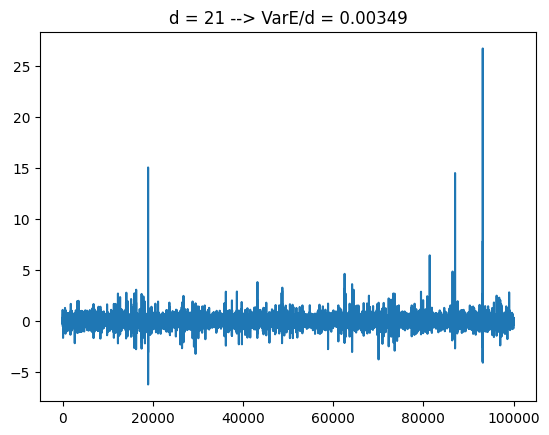

PyObject Text(0.5, 1.0, 'd = 21 --> VarE/d = 0.00349')

In [49]:
plt.plot(E, label="E/d")
plt.title(string("d = ", d, " --> VarE/d = ", round(VarE, digits=5)))

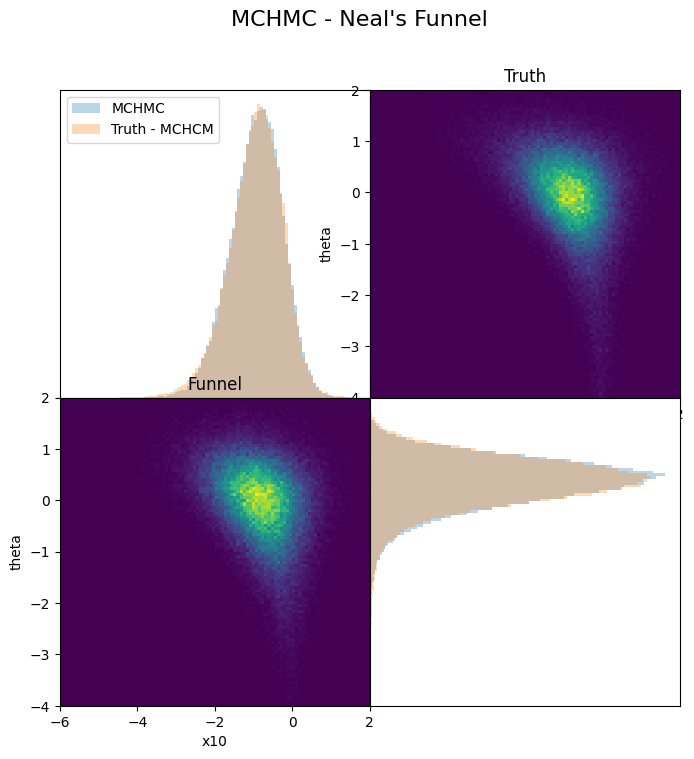

In [50]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("MCHMC - Neal's Funnel", fontsize=16)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(x10_mchmc, bins=100, range=[-6,2], alpha = 0.3, density=true, label="MCHMC")
axis[1,1].hist(true_x10_mchmc, bins=100, range=[-6,2], alpha = 0.3, density=true, label="Truth - MCHCM")
axis[1,1].legend()
axis[1,1].set_yticks([])

axis[2,2].hist(theta_mchmc, bins=100, orientation="horizontal", range=[-6, 2], alpha = 0.3, density=true)
axis[2,2].hist(true_theta_mchmc, bins=100, orientation="horizontal", range=[-6, 2], alpha = 0.3, density=true)
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[1,2].hist2d(true_x10_mchmc, true_theta_mchmc, bins=100, range=[[-6,2],[-4, 2]])
axis[1,2].set_xlabel("x10")
axis[1,2].set_ylabel("theta")
axis[1,2].set_title("Truth")

axis[2,1].hist2d(x10_mchmc, theta_mchmc, bins=100, range=[[-6,2],[-4, 2]])
axis[2,1].set_xlabel("x10")
axis[2,1].set_ylabel("theta")
axis[2,1].set_title("Funnel")
;

## NUTS

In [15]:
samples_hmc = sample(funnel_model, NUTS(10, 0.95), 50_000, progress=true; save_state=true)

┌ Info: Found initial step size
└   ϵ = 1.6
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:42


Chains MCMC chain (50000×33×1 Array{Float64, 3}):

Iterations        = 11:1:50010
Number of chains  = 1
Samples per chain = 50000
Wall duration     = 47.7 seconds
Compute duration  = 47.7 seconds
parameters        = θ, z[1], z[2], z[3], z[4], z[5], z[6], z[7], z[8], z[9], z[10], z[11], z[12], z[13], z[14], z[15], z[16], z[17], z[18], z[19], z[20]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

           θ   -0.0733    0.8739     0.0039    0.0234    1353.1308    1.0002   ⋯
        z[1]    0.3615    0.7135     0.0032    0.0034   52570.5975    1.0000   ⋯
        z[2]   -0.3534    0.7076     0.0032    0.0032   57368.3555    1.0000   ⋯
        z[3]   -0.644

In [16]:
truth_hmc = sample(true_model, NUTS(10, 0.95), 50_000, progress=true; save_state=true)

┌ Info: Found initial step size
└   ϵ = 1.6
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:38


Chains MCMC chain (50000×33×1 Array{Float64, 3}):

Iterations        = 11:1:50010
Number of chains  = 1
Samples per chain = 50000
Wall duration     = 40.6 seconds
Compute duration  = 40.6 seconds
parameters        = θ, z[1], z[2], z[3], z[4], z[5], z[6], z[7], z[8], z[9], z[10], z[11], z[12], z[13], z[14], z[15], z[16], z[17], z[18], z[19], z[20]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

           θ   -0.0775    0.9026     0.0040    0.0095   10078.2516    1.0000   ⋯
        z[1]    0.3407    0.7133     0.0032    0.0026   83626.9824    1.0001   ⋯
        z[2]   -0.3343    0.7156     0.0032    0.0025   82955.6439    1.0000   ⋯
        z[3]   -0.609

In [17]:
theta_hmc = [samples_hmc.value.data[i, 1, :][1] for i in axes(samples_hmc.value.data)[1]]
x10_hmc = [samples_hmc.value.data[i, 10+1, :][1] for i in axes(samples_hmc.value.data)[1]];


In [18]:
true_theta_hmc = [truth_hmc.value.data[i, 1, :][1] for i in axes(truth_hmc.value.data)[1]]
true_x10_hmc = [truth_hmc.value.data[i, 10+1, :][1] * exp(truth_hmc.value.data[i, 1, :][1]/2) for i in axes(truth_hmc.value.data)[1]];


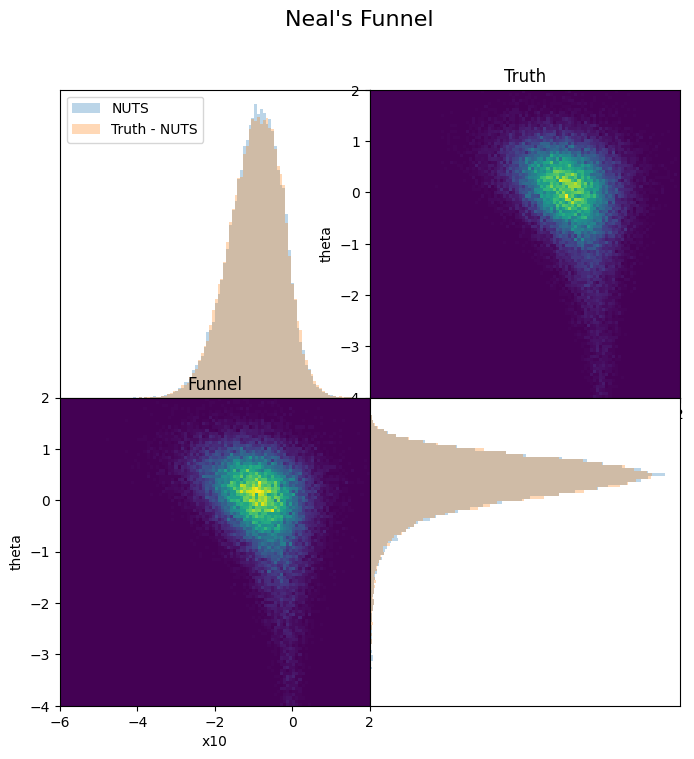

In [19]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("Neal's Funnel", fontsize=16)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(x10_hmc, bins=100, range=[-6,2], alpha = 0.3, label="NUTS")
axis[1,1].hist(true_x10_hmc, bins=100, range=[-6,2], alpha = 0.3, label="Truth - NUTS")
axis[1,1].legend()
axis[1,1].set_yticks([])

axis[2,2].hist(theta_hmc, bins=100, orientation="horizontal", range=[-6, 2], alpha = 0.3)
axis[2,2].hist(true_theta_hmc, bins=100, orientation="horizontal", range=[-6, 2], alpha = 0.3)
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[1,2].hist2d(true_x10_hmc, true_theta_hmc, bins=100, range=[[-6,2],[-4, 2]])
axis[1,2].set_xlabel("x10")
axis[1,2].set_ylabel("theta")
axis[1,2].set_title("Truth")

axis[2,1].hist2d(x10_hmc, theta_hmc, bins=100, range=[[-6,2],[-4, 2]])
axis[2,1].set_xlabel("x10")
axis[2,1].set_ylabel("theta")
axis[2,1].set_title("Funnel")
;

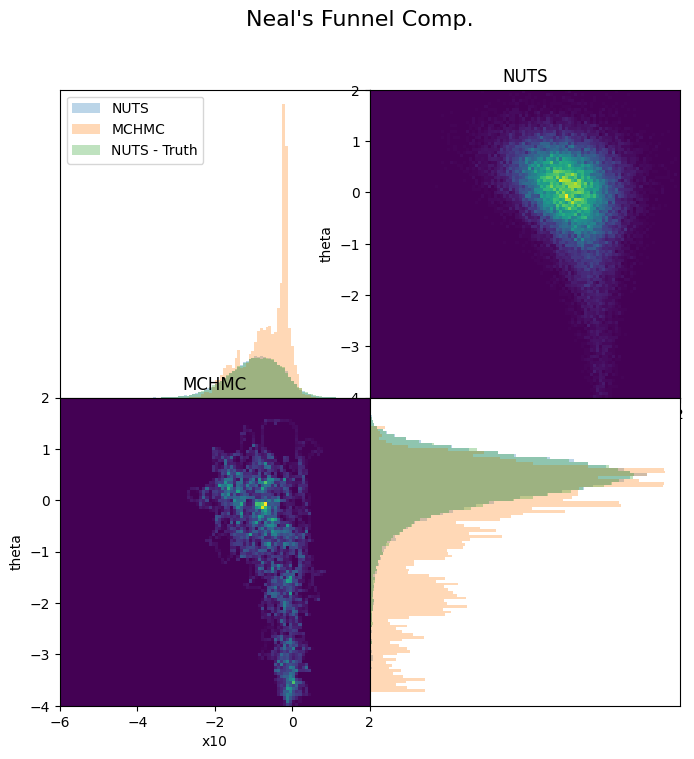

In [20]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("Neal's Funnel Comp.", fontsize=16)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(x10_hmc, bins=100, range=[-6,2], alpha = 0.3, label="NUTS")
axis[1,1].hist(x10_mchmc, bins=100, range=[-6,2], alpha = 0.3, label="MCHMC")
axis[1,1].hist(true_x10_hmc, bins=100, range=[-6,2], alpha = 0.3, label="NUTS - Truth")
axis[1,1].legend()
axis[1,1].set_yticks([])

axis[2,2].hist(theta_hmc, bins=100, orientation="horizontal", range=[-6, 2], alpha = 0.3)
axis[2,2].hist(theta_mchmc, bins=100, orientation="horizontal", range=[-6, 2], alpha = 0.3)
axis[2,2].hist(true_theta_hmc, bins=100,  orientation="horizontal", range=[-6,2], alpha = 0.3)
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[1,2].hist2d(true_x10_hmc, true_theta_hmc, bins=100, range=[[-6,2],[-4, 2]])
axis[1,2].set_xlabel("x10")
axis[1,2].set_ylabel("theta")
axis[1,2].set_title("NUTS")

axis[2,1].hist2d(x10_mchmc, theta_mchmc, bins=100, range=[[-6,2],[-4, 2]])
axis[2,1].set_xlabel("x10")
axis[2,1].set_ylabel("theta")
axis[2,1].set_title("MCHMC")
;